In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [15]:
names = ['id','sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target']
df = pd.read_csv('/content/sample_data/iris.csv')
df.columns = names
df.head()

,id,sepal-length,sepal-width,petal-length,petal-width,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.iloc[:, 2]

,sepal-width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [18]:
df.head()

,id,sepal-length,sepal-width,petal-length,petal-width,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
x = df.loc[:,features]
y = df.loc[:,'target']

In [36]:
x = StandardScaler().fit_transform(x)

In [37]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalComponents = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [38]:
principalComponents.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [41]:
finaldf = pd.concat([principalComponents, y], axis = 1)
finaldf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [42]:
finaldf.isnull().sum()

,0
principal component 1,0
principal component 2,0
target,0


In [43]:
import matplotlib.pyplot as plt

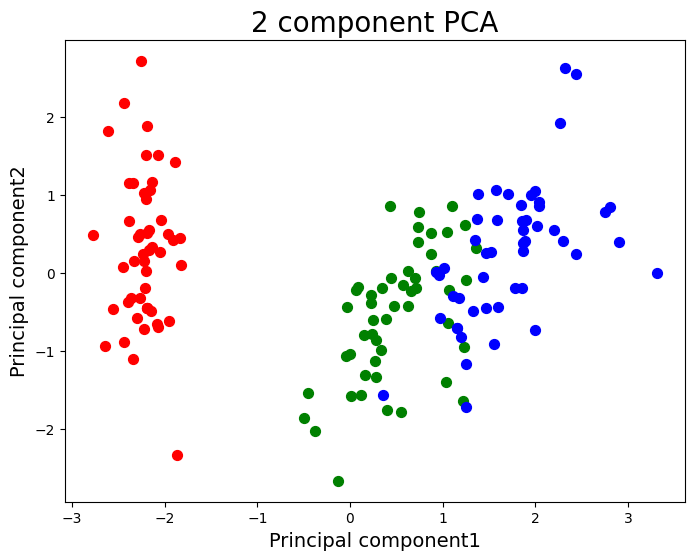

In [51]:
fig = plt.figure(figsize= (8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal component1', fontsize = 14)
ax.set_ylabel('Principal component2', fontsize = 14)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  indicesToKeep = finaldf['target'] == target
  ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1'],finaldf.loc[indicesToKeep, 'principal component 2'], c = color, s  =50)


In [55]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])